In [2]:
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 4.3 MB/s eta 0:00:00


In [8]:
!pip install pca

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from feature_engine.selection import SmartCorrelatedSelection
import torch
from torch.nn import Linear, Sequential, LeakyReLU, ReLU, SELU, GELU, Mish
from torch.utils.data import DataLoader
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from feature_engine.selection import DropCorrelatedFeatures
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,scale, MinMaxScaler
from pca import pca

In [5]:
file_path = '/content/train_1.csv'

data = pd.read_csv(file_path)
data

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21188,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,43.202659,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21189,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,50.148287,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21190,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,5.405448,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21191,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,6.249958,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [6]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [7]:
scaler = StandardScaler(with_mean=True, with_std=True)
X = scaler.fit_transform(X)

In [11]:
model_90 = pca(n_components=90, normalize = True)
result_90 = model_90.fit_transform(X)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >[WARNING]: >Number of components can not be more then number of features. n_components is set to 79
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [80] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[79]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [12]:
loadings_90= result_90['loadings']
loadings_90

,1,2,3,4,5,6,7,8,9,10,...,71,72,73,74,75,76,77,78,79,80
PC1,0.053370,0.101469,0.085236,0.122594,-0.146755,-0.157651,-0.125380,0.089899,-0.099291,-0.114058,...,0.141860,0.146705,0.143251,0.148783,-0.159466,-0.157062,-0.025672,0.109810,-0.007875,0.004165
PC2,-0.227928,-0.196237,-0.221384,-0.181844,-0.119374,-0.081224,-0.072602,-0.112474,-0.058538,-0.046694,...,-0.015937,0.008642,-0.025679,0.003234,-0.087103,-0.075004,0.036087,-0.004715,0.044285,0.042409
PC3,-0.027618,-0.072060,0.007051,-0.043108,-0.069907,-0.057475,-0.115805,-0.060664,-0.125937,-0.109987,...,-0.123101,-0.125516,-0.099028,-0.108278,-0.079429,-0.112525,-0.225832,-0.044911,-0.209248,-0.230942
PC4,0.178964,0.143159,0.148135,0.105847,-0.064715,-0.050885,0.064216,0.110435,0.091731,0.109043,...,0.103394,0.102755,0.097039,0.101821,-0.058105,-0.052720,0.014370,0.063543,0.031386,0.013371
PC5,0.034750,-0.029095,-0.004879,-0.044887,-0.000998,0.002714,0.090907,0.042928,0.111753,0.071622,...,-0.024208,-0.030395,-0.004786,-0.012979,0.032504,-0.016907,-0.137612,0.061481,-0.121060,-0.164271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC75,0.350278,-0.525923,-0.342047,0.542551,0.042022,-0.069192,0.021054,0.003524,-0.114142,0.116737,...,0.086793,-0.055893,-0.074928,0.037606,0.056290,-0.025846,-0.015070,0.000423,0.011421,-0.001776
PC76,0.007080,-0.010195,-0.001757,0.005211,-0.060918,0.027770,-0.004770,0.005388,-0.010083,0.002628,...,-0.287858,-0.272448,0.302690,0.258252,-0.544512,-0.024012,-0.030802,0.008261,0.008287,0.025914
PC77,-0.025051,0.028341,0.024918,-0.031425,-0.028648,0.014656,0.000591,0.005523,0.001666,-0.006888,...,0.048087,0.082104,-0.057576,-0.074411,0.209435,0.009092,0.007889,-0.001463,0.004792,-0.005826
PC78,0.039121,-0.072194,-0.039915,0.079539,-0.001303,-0.010515,0.000261,-0.002834,-0.013870,0.021332,...,-0.019456,-0.007878,0.025759,0.005065,-0.019891,-0.034919,-0.001961,-0.007459,0.001363,0.004156


In [13]:
scores_90 = result_90['PC']
scores_90['critical_temp']= data['critical_temp'].values
scores_90 = scores_90.reset_index(drop=True)
scores_90

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,critical_temp
0,-3.725198,0.673088,3.021551,1.752208,0.245684,-0.246756,0.424016,-0.217874,-0.400567,0.213369,...,-0.018035,-0.018134,-0.009839,0.002679,0.001128,0.003540,0.004888,-0.003742,0.005672,29.00
1,-4.502547,-0.381233,1.666412,1.134388,0.978487,-0.976002,-0.338551,0.221656,0.407095,-1.121419,...,0.055741,-0.034696,-0.017687,-0.025817,0.012353,0.025852,0.004699,-0.009280,0.001192,26.00
2,-3.547279,0.732496,3.113804,1.856136,0.295273,-0.251790,0.463819,0.010845,-0.510629,0.176818,...,-0.024452,-0.015265,-0.004299,0.001679,-0.000613,0.002211,0.003269,-0.006231,0.004871,19.00
3,-3.641222,0.699709,3.063986,1.802170,0.269820,-0.250232,0.442177,-0.107328,-0.454430,0.194415,...,-0.021127,-0.017242,-0.007364,0.002243,0.000529,0.002893,0.004138,-0.004892,0.005347,22.00
4,-3.871798,0.632704,2.952901,1.661103,0.199854,-0.235467,0.395156,-0.422837,-0.297639,0.253740,...,-0.012308,-0.017707,-0.013409,0.003194,0.001160,0.004728,0.006103,-0.001804,0.006006,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21188,2.408783,-0.212277,-1.393485,-2.446617,2.912397,-1.792461,-0.094385,-1.018681,-0.226881,1.199733,...,-0.046665,0.051762,-0.053560,0.017762,0.025001,0.022962,-0.013687,0.038175,0.000538,2.44
21189,-5.400238,-0.923353,1.236743,-0.310368,1.145621,0.112421,0.980301,-0.775298,0.337085,-0.821135,...,0.000414,-0.014144,0.009020,0.016222,0.000563,-0.015475,0.001118,0.007385,-0.000799,122.10
21190,10.407867,-0.972395,1.570774,-0.315944,-0.235005,-1.199269,-0.912271,0.061791,-0.727201,-0.361774,...,-0.059574,-0.035777,0.009001,-0.018138,-0.000373,0.009824,0.012634,0.003128,0.007722,1.98
21191,9.693212,-1.022613,1.199889,-0.842030,-0.971780,-0.612568,-0.819690,-1.616050,0.140556,-0.066145,...,-0.038398,-0.034874,0.004578,-0.009728,-0.002833,0.009445,0.010066,-0.005580,0.008331,1.84


In [52]:
X = scores_90.iloc[:, 0:-1]
y = scores_90.iloc[:, -1]

X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79
0,-3.725198,0.673088,3.021551,1.752208,0.245684,-0.246756,0.424016,-0.217874,-0.400567,0.213369,...,-0.003459,-0.018035,-0.018134,-0.009839,0.002679,0.001128,0.003540,0.004888,-0.003742,0.005672
1,-4.502547,-0.381233,1.666412,1.134388,0.978487,-0.976002,-0.338551,0.221656,0.407095,-1.121419,...,-0.029039,0.055741,-0.034696,-0.017687,-0.025817,0.012353,0.025852,0.004699,-0.009280,0.001192
2,-3.547279,0.732496,3.113804,1.856136,0.295273,-0.251790,0.463819,0.010845,-0.510629,0.176818,...,-0.014921,-0.024452,-0.015265,-0.004299,0.001679,-0.000613,0.002211,0.003269,-0.006231,0.004871
3,-3.641222,0.699709,3.063986,1.802170,0.269820,-0.250232,0.442177,-0.107328,-0.454430,0.194415,...,-0.008606,-0.021127,-0.017242,-0.007364,0.002243,0.000529,0.002893,0.004138,-0.004892,0.005347
4,-3.871798,0.632704,2.952901,1.661103,0.199854,-0.235467,0.395156,-0.422837,-0.297639,0.253740,...,0.004426,-0.012308,-0.017707,-0.013409,0.003194,0.001160,0.004728,0.006103,-0.001804,0.006006


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0,
)

X_train.shape, X_test.shape

((16954, 79), (4239, 79))

In [28]:
# train-test split
dataloaders = {
    'train': DataLoader(
        list(zip(X_train.values, y_train.values)),
        batch_size=32
    ),
    'test': DataLoader(
        list(zip(X_test.values, y_test.values)),
        batch_size=32
    )
}

In [34]:
for x, y in dataloaders['train']:
  break

In [44]:
y_pred.squeeze(1).shape

torch.Size([32])

In [45]:
 def train(model, dataloaders, lr, epochs):

    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler =torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=625)

    metrics = {'train' : {
        'mse_loss': [], 'mae_loss': [], 'mape_loss': [], 'r2_score': [], 'lr': [1]
        },
              'test' : {
                  'mse_loss': [], 'mae_loss': [], 'mape_loss': [], 'r2_score': [], 'lr': [1]
                  }
               }

    for epoch in range(epochs):
        for phase in ['train', 'test']:

            epoch_loss = 0.
            epoch_r2_score = 0.
            epoch_mae_loss = 0.
            epoch_mape_loss = 0.

            for x, y in dataloaders[phase]:

                y_pred = model(x.float())
                loss_value = criterion(y.float(), y_pred.squeeze(1))
                epoch_loss += loss_value.item()

                optimizer.zero_grad()

                if phase == 'train':
                    loss_value.backward()
                    optimizer.step()
                    scheduler.step(loss_value)

                y = y.detach().numpy()
                y_pred = y_pred.squeeze(1).detach().numpy()
                epoch_r2_score += r2_score(y, y_pred)
                epoch_mae_loss += mean_absolute_error(y, y_pred)
                epoch_mape_loss += mean_absolute_percentage_error(y, y_pred)

            metrics[phase]['mse_loss'].append(epoch_loss/len(dataloaders[phase]))
            metrics[phase]['r2_score'].append(epoch_r2_score/len(dataloaders[phase]))
            metrics[phase]['mae_loss'].append(epoch_mae_loss/len(dataloaders[phase]))
            metrics[phase]['mape_loss'].append(epoch_mape_loss/len(dataloaders[phase]))
            metrics[phase]['lr'].append(optimizer.param_groups[0]['lr'])

    return metrics


Проведём поиск наилучшей функции активации для данной архитектуры.

In [46]:
activ_funcs = [LeakyReLU, ReLU, SELU, GELU, Mish]
history = {}

for func in activ_funcs:

  model = Sequential(
              Linear(79, 256),
              func(),
              Linear(256, 512),
              func(),
              Linear(512, 256),
              func(),
              Linear(256, 64),
              func(),
              Linear(64, 1)
          )

  history[func.__name__] = train(model, dataloaders, 0.001, 15)

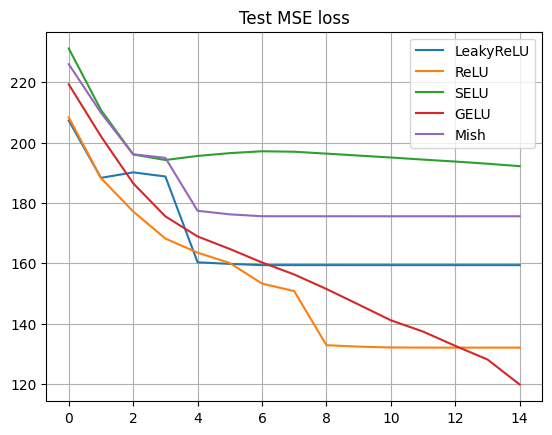

In [49]:
func_names = list(history.keys())

for func_name in func_names:
  plt.plot(range(15), history[func_name]['test']['mse_loss'])
plt.title('Test MSE loss')
plt.legend(func_names)
plt.grid(True)
plt.show()

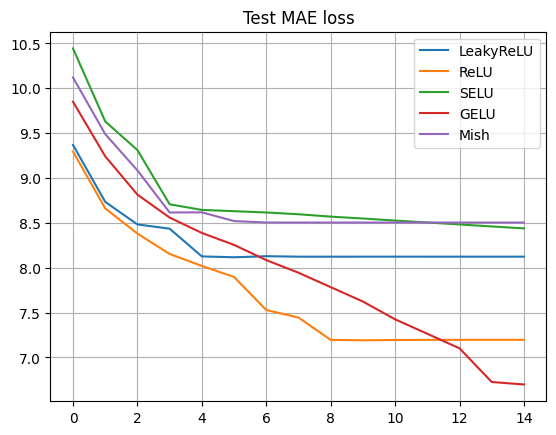

In [50]:
for func_name in func_names:
  plt.plot(range(15), history[func_name]['test']['mae_loss'])
plt.title('Test MAE loss')
plt.legend(func_names)
plt.grid(True)
plt.show()

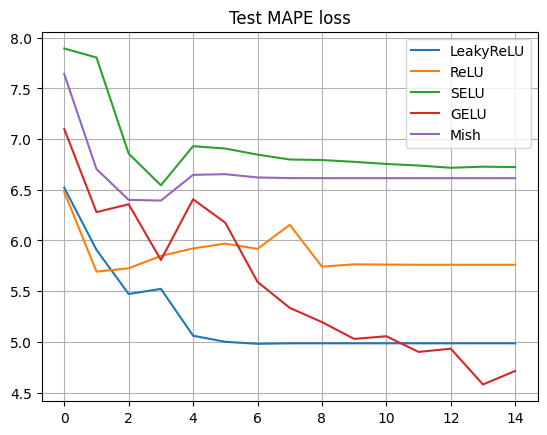

In [54]:
for func_name in func_names:
  plt.plot(range(15), history[func_name]['test']['mape_loss'])
plt.title('Test MAPE loss')
plt.legend(func_names)
plt.grid(True)
plt.show()

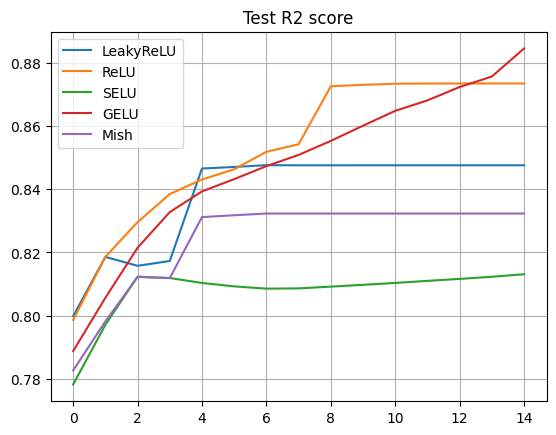

In [55]:
for func_name in func_names:
  plt.plot(range(15), history[func_name]['test']['r2_score'])
plt.title('Test R2 score')
plt.legend(func_names)
plt.grid(True)
plt.show()

По всем метрикам функция активации `GELU` оказывается наилучшей.